In [1]:
from __future__ import division, print_function

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

In [2]:
df = pd.read_pickle('../data/deepmind_data.pkl')

In [24]:
df.head(10)

,euclidean_linda,name,time,training_cost
0,16.0,inet-sl_subj19_50,0.0,0.01416
1,13.0,inet-sl_subj19_50,6.0,0.44698
2,26.0,inet-sl_subj19_50,400.0,0.63396
3,22.0,inet-sl_subj19_50,787.0,0.72554
4,26.0,inet-sl_subj19_50,1588.0,0.77058
5,21.0,inet-sl_subj19_50,2389.0,0.79384
6,29.0,inet-sl_subj19_50,3594.0,0.80168
7,29.0,inet-sl_subj19_50,4796.0,0.81056
8,35.0,inet-sl_subj19_50,5983.0,0.82000
9,26.0,inet-sl_subj19_50,7562.0,0.82938


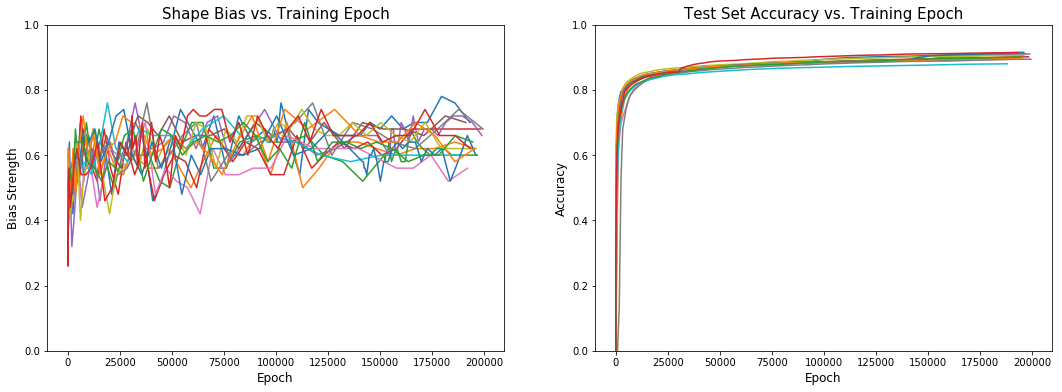

In [45]:
upto = 200000
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
# First, do the bias plots
for name in df.name.unique():
    if name == "inet-sl_subj13_50":
        continue
    x = df[df.name==name].time.values
    y = df[df.name==name]['euclidean_linda'].values
    y = y/50.
    
    y = y[np.where(x < upto)]
    x = x[np.where(x < upto)]
    axes[0].plot(x, y)
    axes[0].set_ylim(0,1)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Bias Strength', fontsize=12)
    axes[0].set_title('Shape Bias vs. Training Epoch', fontsize=15)
# Now, do the loss plots
for name in df.name.unique():
    if name == "inet-sl_subj13_50":
        continue
    x = df[df.name==name].time.values
    y = df[df.name==name]['training_cost'].values
    
    y = y[np.where(x < upto)]
    x = x[np.where(x < upto)]
    axes[1].plot(x, y)
    axes[1].set_ylim(0,1)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy', fontsize=12)
    axes[1].set_title('Test Set Accuracy vs. Training Epoch', fontsize=15)